In [ ]:
# pip install tensorflow

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
model = tf.keras.models.load_model('Globalmodel_FederatedAveraging.h5')

In [3]:
df_lp1 = pd.read_excel('Laptop1_preprocessedDS.xlsx',engine='openpyxl')


In [4]:
df_lp1.columns

Index(['Weather_CLEAR', 'Weather_CLOUDY', 'Weather_FOGGY', 'Weather_OTHER',
       'Weather_RAINING', 'Weather_SLEET', 'Weather_SNOW',
       'Weather_WINTRY MIX', 'Road Condition_DRY', 'Road Condition_ICE',
       'Road Condition_OTHER', 'Road Condition_WET', 'Hour', 'Rush_Hour'],
      dtype='object')

In [5]:
df_lp1.rename(columns={
    'Weather_CLEAR': 'Weather_CLEAR',
    'Weather_CLOUDY': 'Weather_CLOUDY',
    'Weather_FOGGY': 'Weather_FOGGY',
    'Weather_OTHER': 'Weather_OTHER',
    'Weather_RAINING': 'Weather_RAINING',
    'Weather_SLEET': 'Weather_SLEET',
    'Weather_SNOW': 'Weather_SNOW',
    'Weather_WINTRY MIX': 'Weather_WINTRY MIX',
    'Road Condition_DRY': 'Road Condition_DRY',
    'Road Condition_ICE': 'Road Condition_ICE',
    'Road Condition_OTHER': 'Road Condition_OTHER',
    'Road Condition_WET': 'Road Condition_WET',
    'Hour': 'Hour',
    'Rush_Hour': 'Rush_Hour'
}, inplace=True)
df_lp1.head(5)

,Weather_CLEAR,Weather_CLOUDY,Weather_FOGGY,Weather_OTHER,Weather_RAINING,Weather_SLEET,Weather_SNOW,Weather_WINTRY MIX,Road Condition_DRY,Road Condition_ICE,Road Condition_OTHER,Road Condition_WET,Hour,Rush_Hour
0,1,0,0,0,0,0,0,0,1,0,0,0,12,0
1,1,0,0,0,0,0,0,0,1,0,0,0,12,0
2,1,0,0,0,0,0,0,0,1,0,0,0,21,0
3,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,12,0


In [7]:
df_lp2 = pd.read_excel('Laptop2_preprocessedDS.xlsx', engine='openpyxl')


In [8]:
df_lp2.columns

Index(['Weather_CLEAR', 'Weather_CLOUDY/OVERCAST', 'Weather_FOG/SMOKE/HAZE',
       'Weather_FREEZING RAIN/DRIZZLE', 'Weather_OTHER', 'Weather_RAIN',
       'Weather_SLEET/HAIL', 'Weather_SNOW', 'Road Condition_DRY',
       'Road Condition_ICE', 'Road Condition_OTHER', 'Road Condition_WET',
       'Hour', 'Rush_Hour'],
      dtype='object')

In [9]:
df_lp2.rename(columns={
    'Weather_CLEAR': 'Weather_CLEAR',
    'Weather_CLOUDY/OVERCAST': 'Weather_CLOUDY',
    'Weather_FOG/SMOKE/HAZE': 'Weather_FOGGY',    
    'Weather_FREEZING RAIN/DRIZZLE': 'Weather_WINTRY MIX',
    'Weather_OTHER': 'Weather_OTHER',
    'Weather_RAIN': 'Weather_RAINING',
    'Weather_SLEET/HAIL': 'Weather_SLEET',
    'Weather_SNOW': 'Weather_SNOW',
    'Road Condition_DRY': 'Road Condition_DRY',
    'Road Condition_ICE': 'Road Condition_ICE',
    'Road Condition_OTHER': 'Road Condition_OTHER',
    'Road Condition_WET': 'Road Condition_WET',
    'Hour': 'Hour',
    'Rush_Hour': 'Rush_Hour'
}, inplace=True)
df_lp2.head(5)

,Weather_CLEAR,Weather_CLOUDY,Weather_FOGGY,Weather_WINTRY MIX,Weather_OTHER,Weather_RAINING,Weather_SLEET,Weather_SNOW,Road Condition_DRY,Road Condition_ICE,Road Condition_OTHER,Road Condition_WET,Hour,Rush_Hour
0,1,0,0,0,0,0,0,0,1,0,0,0,19,1
1,1,0,0,0,0,0,0,0,1,0,0,0,18,1
2,1,0,0,0,0,0,0,0,1,0,0,0,14,0
3,1,0,0,0,0,0,0,0,1,0,0,0,23,0
4,1,0,0,0,0,0,0,0,1,0,0,0,12,0


In [10]:
df_lp3 = pd.read_excel('Laptop3_preprocessedDS.xlsx', engine = 'openpyxl')
df_lp3.head(5)

,Weather_1.0,Weather_2.0,Weather_3.0,Weather_4.0,Weather_5.0,Weather_6.0,Weather_8.0,Weather_9.0,Road Condition_1.0,Road Condition_2.0,Road Condition_3.0,Road Condition_4.0,Hour,Rush_Hour
0,1,0,0,0,0,0,0,0,1,0,0,0,9,1
1,1,0,0,0,0,0,0,0,1,0,0,0,14,0
2,0,1,0,0,0,0,0,0,1,0,0,0,12,0
3,0,1,0,0,0,0,0,0,1,0,0,0,11,0
4,0,1,0,0,0,0,0,0,1,0,0,0,16,1


In [11]:
df_lp3.columns

Index(['Weather_1.0', 'Weather_2.0', 'Weather_3.0', 'Weather_4.0',
       'Weather_5.0', 'Weather_6.0', 'Weather_8.0', 'Weather_9.0',
       'Road Condition_1.0', 'Road Condition_2.0', 'Road Condition_3.0',
       'Road Condition_4.0', 'Hour', 'Rush_Hour'],
      dtype='object')

In [12]:
df_lp3.rename(columns={
    'Weather_1.0': 'Weather_CLEAR',
    'Weather_2.0': 'Weather_CLOUDY',
    'Weather_3.0': 'Weather_FOGGY',    
    'Weather_4.0': 'Weather_WINTRY MIX',
    'Weather_5.0': 'Weather_OTHER',
    'Weather_6.0': 'Weather_RAINING',
    'Weather_8.0': 'Weather_SLEET',
    'Weather_9.0': 'Weather_SNOW',
    'Road Condition_1.0': 'Road Condition_DRY',
    'Road Condition_2.0': 'Road Condition_ICE',
    'Road Condition_3.0': 'Road Condition_OTHER',
    'Road Condition_4.0': 'Road Condition_WET',
    'Hour': 'Hour',
    'Rush_Hour': 'Rush_Hour'
}, inplace=True)
df_lp3.head(5)

,Weather_CLEAR,Weather_CLOUDY,Weather_FOGGY,Weather_WINTRY MIX,Weather_OTHER,Weather_RAINING,Weather_SLEET,Weather_SNOW,Road Condition_DRY,Road Condition_ICE,Road Condition_OTHER,Road Condition_WET,Hour,Rush_Hour
0,1,0,0,0,0,0,0,0,1,0,0,0,9,1
1,1,0,0,0,0,0,0,0,1,0,0,0,14,0
2,0,1,0,0,0,0,0,0,1,0,0,0,12,0
3,0,1,0,0,0,0,0,0,1,0,0,0,11,0
4,0,1,0,0,0,0,0,0,1,0,0,0,16,1


In [17]:
df_all = pd.concat([df_lp1, df_lp2, df_lp3], ignore_index=True)
df_all.head(5)

,Weather_CLEAR,Weather_CLOUDY,Weather_FOGGY,Weather_OTHER,Weather_RAINING,Weather_SLEET,Weather_SNOW,Weather_WINTRY MIX,Road Condition_DRY,Road Condition_ICE,Road Condition_OTHER,Road Condition_WET,Hour,Rush_Hour
0,1,0,0,0,0,0,0,0,1,0,0,0,12,0
1,1,0,0,0,0,0,0,0,1,0,0,0,12,0
2,1,0,0,0,0,0,0,0,1,0,0,0,21,0
3,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,12,0


In [19]:
def evaluate_model(model, X_test, y_test):
    
    # Evaluating on X_test checks model accuracy on new data;
    # 0.5 is a threshold for binary outcomes
    # Make predictions
    y_pred = model.predict(X_test).ravel() 
    y_pred_binary = (y_pred > 0.5).astype(int)    
    
    print("range(len(y_test)")
    print(range(len(y_test)))
    print("range(len(y_pred)")
    print(range(len(y_pred)))
          
    plt.figure(figsize=(10, 6))

    # Plotting the observed (actual) values vs predicted probabilities
    observed = plt.scatter(range(len(y_test)), y_test, color='red', label='Observed', alpha=0.5, marker='o')

    # Plotting the same for predicted binary outcomes for comparison
    predicted = plt.scatter(range(len(y_pred_binary)), y_pred_binary, color='blue', label='Predicted', alpha=0.5, marker='x')

    # Draw a line of best fit for observed vs predicted
    m, b = np.polyfit(range(len(y_test)), y_pred, 1)
    plt.plot(range(len(y_test)), m*np.arange(len(y_test)) + b, color='green', label='Fit')

    # Enhance plot
    plt.title('Observed vs Predicted')
    plt.xlabel('Samples')
    plt.ylabel('Output label')
    plt.legend(handles=[observed, predicted])
    plt.show()  
    
    # confusion matrix
    # https://neptune.ai/blog/evaluation-metrics-binary-classification
    print("confusion matrix")
    cm = confusion_matrix(y_test, y_pred_binary)
    tn, fp, fn, tp = cm.ravel()
    false_positive_rate = fp / (fp + tn)
    print(f"False Positive Rate: {false_positive_rate}")
    false_negative_rate = fn / (tp + fn)
    print(f"False Negative Rate: {false_negative_rate}")
    true_negative_rate = tn / (tn + fp)
    print(f"True Negative Rate: {true_negative_rate}")   

    if (tn + fn) > 0:
        negative_predictive_value = tn / (tn + fn)
        print(f"Negative Prediction Value: {negative_predictive_value}")
    else:
        print("Negative Prediction Value: Undefined (no true or false negatives)")
    
    if (tp + fp) == 0:
        false_discovery_rate = 0
        print(f"False Discovery Rate: {false_discovery_rate}")  
    else:
        false_discovery_rate = fp/ (tp + fp)
        print(f"False Discovery Rate: {false_discovery_rate}") 
        
    recall = recall_score(y_test, y_pred_binary) 
    print(f"recall: {recall}")
    precision = precision_score(y_test, y_pred_binary) 
    print(f"precision: {precision}")    
    fbeta = fbeta_score(y_test, y_pred_binary, beta=2)
    print(f"fbeta: {fbeta}")
    f1= f1_score(y_test, y_pred_binary)
    print(f"f1: {f1}")
    f2 = fbeta_score(y_test, y_pred_binary, beta = 2)
    print(f"f2: {f2}")
    cohen_kappa = cohen_kappa_score(y_test, y_pred_binary)
    print(f"cohen_kappa: {cohen_kappa}") 
    
    
    # Classification report (precision, recall, F1-score)
    print("Classification Report:")
    print(classification_report(y_test, y_pred_binary, zero_division=0))

    # ROC-AUC score
    try:
        roc_auc = roc_auc_score(y_test, y_pred)
        print(f"ROC_AUC score: {roc_auc}")
        
    except:
        # Handle cases where ROC-AUC can not be computed
        print("ROC-AUC score cannot be computed for this model configuration.")
        
    # Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(y_test, y_pred_binary)
    print(f"Matthews Correlation Coefficient (MCC): {mcc}")
    

Data preprocessing complete.
Compiling and training the model.
Epoch 1/10
5923/5923 ━━━━━━━━━━━━━━━━━━━━ 5s 757us/step - accuracy: 0.9995 - loss: 0.0020
Epoch 2/10
5923/5923 ━━━━━━━━━━━━━━━━━━━━ 5s 813us/step - accuracy: 1.0000 - loss: 3.4056e-04
Epoch 3/10
5923/5923 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9994 - loss: 0.0030
Epoch 4/10
5923/5923 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9999 - loss: 4.9191e-04
Epoch 5/10
5923/5923 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 1.0000 - loss: 2.0375e-04
Epoch 6/10
5923/5923 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 1.0000 - loss: 4.2339e-04
Epoch 7/10
5923/5923 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9998 - loss: 0.0012
Epoch 8/10
5923/5923 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9996 - loss: 0.0034
Epoch 9/10
5923/5923 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 1.0000 - loss: 3.2450e-05
Epoch 10/10
5923/5923 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9990 - loss: 0.0051
19990/19990 ━━━━━━━━━━━━

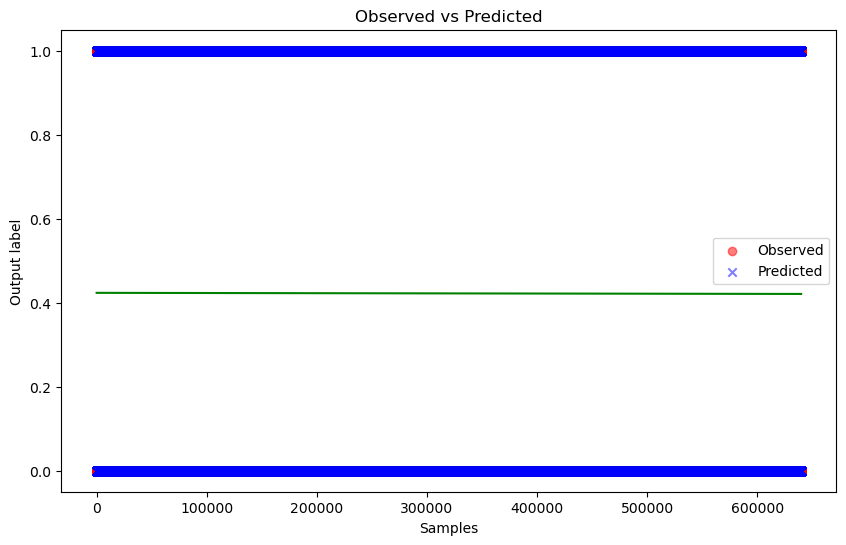

confusion matrix
False Positive Rate: 0.00014878859034984256
False Negative Rate: 0.0
True Negative Rate: 0.9998512114096502
Negative Prediction Value: 1.0
False Discovery Rate: 0.00020364185691752875
recall: 1.0
precision: 0.9997963581430824
fbeta: 0.9999592649923343
f1: 0.999898168702984
f2: 0.9999592649923343
cohen_kappa: 0.9998237688742213
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    369652
           1       1.00      1.00      1.00    270027

    accuracy                           1.00    639679
   macro avg       1.00      1.00      1.00    639679
weighted avg       1.00      1.00      1.00    639679

ROC_AUC score: 0.9999999454596571
Matthews Correlation Coefficient (MCC): 0.9998237844001899


In [21]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pickle
from sklearn.metrics import classification_report, roc_auc_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, fbeta_score, cohen_kappa_score
import matplotlib.pyplot as plt

X = df_all.iloc[:, :-1].values
y = df_all.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
print("Data preprocessing complete.")

print("Compiling and training the model.")
# for binary classification task
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=12)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Model accuracy: {accuracy}") 

evaluate_model(model, X_test, y_test)